# Guided Project: Exploring Hacker News Posts

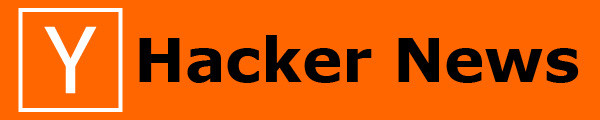

__Overview__

Hacker News is a site started by the startup incubator Y Combinator, where user-submitted stories (known as "posts") receive votes and comments, similar to reddit. Hacker News is extremely popular in technology and startup circles, and posts that make it to the top of the Hacker News listings can get hundreds of thousands of visitors as a result.

[Data Set](https://www.kaggle.com/datasets/hacker-news/hacker-news-posts)

_We're specifically interested in posts with titles that begin with either Ask HN or Show HN. Users submit Ask HN posts to ask the Hacker News community a specific question._

__Key points__

Our key point in this project is to answer the question _"Do posts created at a certain time recieve more comments on average?"_

## 1. Importing Data and Removng Headers from a List of Lists
---

Firstly, before we start our analysis we'll set up our work station and import our dataset then print out a couple of rows to see what our dataset has and do a quick analysis on what is provided for us.

In [1]:
from csv import reader
# Opening dataset

open_file = open('hacker_news.csv')
read_file = reader(open_file)
hn = list(read_file)

# Seperating header from dataset into seperate list
headers = hn[0]
hn = hn[1:]

print(hn[:5], '\n')
print(headers)

[['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52'], ['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30'], ['11964716', "Florida DJs May Face Felony for April Fools' Water Joke", 'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/', '2', '1', 'vezycash', '6/23/2016 22:20'], ['11919867', 'Technology ventures: From Idea to Enterprise', 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429', '3', '1', 'hswarna', '6/17/2016 0:01'], ['10301696', 'Note by Note: The Making of Steinway L1037 (2007)', 'http://www.nytimes.com/2007/11/07/movies/07stein.html?_r=0', '8', '2', 'walterbell', '9/30/2015 4:12']] 

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']


From the information that we gathered from so far we have the following columns

**Descriptions of the columns**

* __id__: the unique identifier from Hacker News for the post
* __title__: the title of the post
* __url__: the URL that the posts links to, if the post has a URL
* __num_points__: the number of points the post acquired, calculated as the total number of upvotes minus the total number of downvotes
* __num_comments__: the number of comments on the post
* __author__: the username of the person who submitted the post
* __created_at__: the date and time of the post's submission

## 2. Extracting Ask HN and Show HN Posts
---

Now that we've removed the headers from hn, we're ready to filter our data. Since we're only concerned with post titles beginning with Ask HN or Show HN, we'll create new lists of lists containing just the data for those titles.

To solve this problem we'll use a string method (startswith)

In [2]:
# Empty lists to be appeneded 
ask_posts = []
show_posts = []
other_posts = []

for row in hn:
    title = row[1]
    if title.lower().startswith('ask hn'):
        ask_posts.append(row)
    elif title.lower().startswith('show hn'):
        show_posts.append(row)
    else:
        other_posts.append(row)
        
print('Number of Asked Posts:', len(ask_posts))
print('Number of Showed Posts:', len(show_posts))
print('Number of Other Posts:', len(other_posts))



Number of Asked Posts: 1744
Number of Showed Posts: 1162
Number of Other Posts: 17194


From the extracted post, we can conclude so far that we have:
* 1744 _asked posts_
* 1162 _showed posts_
* 17194 _other posts_

## 3. Calculating the Average Number of Comments for Ask HN and Show HN Posts
---

In our previous section, we separated the "ask posts" and the "show posts" into two lists of lists named ask_posts and show_posts.

Below are the frist five rows in the ask_posts list of lists:

In [3]:
print(ask_posts[:5], '\n')

[['12296411', 'Ask HN: How to improve my personal website?', '', '2', '6', 'ahmedbaracat', '8/16/2016 9:55'], ['10610020', 'Ask HN: Am I the only one outraged by Twitter shutting down share counts?', '', '28', '29', 'tkfx', '11/22/2015 13:43'], ['11610310', 'Ask HN: Aby recent changes to CSS that broke mobile?', '', '1', '1', 'polskibus', '5/2/2016 10:14'], ['12210105', 'Ask HN: Looking for Employee #3 How do I do it?', '', '1', '3', 'sph130', '8/2/2016 14:20'], ['10394168', 'Ask HN: Someone offered to buy my browser extension from me. What now?', '', '28', '17', 'roykolak', '10/15/2015 16:38']] 



And here are the first five rows in the show_posts list of lists:

In [4]:
print(show_posts[:5], '\n')

[['10627194', 'Show HN: Wio Link  ESP8266 Based Web of Things Hardware Development Platform', 'https://iot.seeed.cc', '26', '22', 'kfihihc', '11/25/2015 14:03'], ['10646440', 'Show HN: Something pointless I made', 'http://dn.ht/picklecat/', '747', '102', 'dhotson', '11/29/2015 22:46'], ['11590768', 'Show HN: Shanhu.io, a programming playground powered by e8vm', 'https://shanhu.io', '1', '1', 'h8liu', '4/28/2016 18:05'], ['12178806', 'Show HN: Webscope  Easy way for web developers to communicate with Clients', 'http://webscopeapp.com', '3', '3', 'fastbrick', '7/28/2016 7:11'], ['10872799', 'Show HN: GeoScreenshot  Easily test Geo-IP based web pages', 'https://www.geoscreenshot.com/', '1', '9', 'kpsychwave', '1/9/2016 20:45']] 



Now that we're getting more familiar with what are data is looking like, let's determine if ask posts or show posts recieve more comment on average!

To do this we'll need to:

__Step 1:__ Find the total number of comments in ask posts, and assign it to a variable and iterate over the ask posts.

__Step 2:__ Compute the average number of comments on ask posts, and assign it to a new variable

__Step 3:__ Repeat the process with the show post list and then reveal our findings

In [5]:
# Creating a placeholder for our total ask comments
total_ask_comments = 0

# Performing operation to find avg comments in ask comments
for row in ask_posts:
    count_comments = int(row[4])
    total_ask_comments += count_comments
    
avg_ask_comments = total_ask_comments / len(ask_posts)

print('Average comments in "ask hn":',avg_ask_comments)

Average comments in "ask hn": 14.038417431192661


In [6]:
# Creating a placeholder for our total show comments
total_show_comments = 0

# Performing operation to find avg comments in show comments
for row in show_posts:
    count_comments = int(row[4])
    total_show_comments += count_comments
    
avg_show_comments = total_show_comments / len(show_posts)

print('Average comments in "show hn":', avg_show_comments)

Average comments in "show hn": 10.31669535283993


From our findings we can see we get a higher average of comments from ask posts and based on intuition, I believe there is a strong correlation between comments and questions because these may not be comments but answers to the post, as it suggests "ask" posts. Rather than comments or their personal opinons on what is being showcased in the show posts.

## 4. Finding the Number of Ask Posts and Comments by Hour Created
---

On the previous sections, we've determined that, on average, ask posts receive more comments than show posts. Since ask posts are more likely to receive comments, we'll focus our remaining analysis just on these posts.

Next, we'll determine if ask posts created at a certain time are more likely to attract comments. We'll set up tasks to perform this analysis:

__Task 1__: Calculate the number of ask posts created in each hour of the day, along with the number of comments received.

__Task 2__: Calculate the average number of comments ask posts receive by hour created.


In [7]:
#Importing datetime module to perform analysis
import datetime as dt

# Creating a place holder for our results
result_list = []

for row in ask_posts:
    created_at = row[6]
    num_comments = int(row[4])
    result_list.append([created_at, num_comments])

# Creating place holder for our hours and comments
counts_by_hour = {}
comments_by_hour = {}

for row in result_list:
    date = row[0]
    comment_count = row[1]
    
# Extracting time from result list
    date_dt = dt.datetime.strptime(date, "%m/%d/%Y %H:%M")
    hour = date_dt.strftime("%H")
    
# Updates counted hours and comments
    if hour not in counts_by_hour:
        counts_by_hour[hour] = 1
        comments_by_hour[hour] = comment_count
    else:
        counts_by_hour[hour] += 1
        comments_by_hour[hour] += comment_count
    
    

    

### 4. (Continued) Calculating the Average Number of Comments for Ask HN Posts by Hour

Now that we've completed our first task which was to calculate the number of ask posts along with the comments, next we'll use these two dictionaries to calculate the average number of comments for posts created during each hour of the day.

In [8]:
avg_by_hour = []

# Performing operation to find avg comments by each hour
for row in counts_by_hour:
    avg_comments = comments_by_hour[row] / counts_by_hour[hour]
    avg_by_hour.append([row, avg_comments])
    
print(avg_by_hour, '\n')


[['09', 5.5777777777777775], ['13', 27.844444444444445], ['10', 17.622222222222224], ['14', 31.466666666666665], ['16', 40.31111111111111], ['23', 12.066666666666666], ['12', 15.266666666666667], ['17', 25.466666666666665], ['15', 99.4888888888889], ['21', 38.77777777777778], ['20', 38.266666666666666], ['02', 30.68888888888889], ['18', 31.977777777777778], ['03', 9.355555555555556], ['05', 10.311111111111112], ['19', 26.4], ['01', 15.177777777777777], ['22', 10.644444444444444], ['08', 10.933333333333334], ['04', 7.488888888888889], ['00', 9.933333333333334], ['06', 8.822222222222223], ['07', 5.933333333333334], ['11', 14.244444444444444]] 



Here the results represent the average amount of comments that are left per each hour in the form of military time/24-hour clock. The calculation can assist our analysis in pattern recognition on what would be the best time of day to ask a question!

## 5. Sorting and Printing Values from a List of Lists
---

Lastly, we need to re-format our findings and make readabilty better so we have a better time looking through our analysis.

### 5. (Continued) Swapping Columns

First what we want to do first is to swap our indexs, meaning we want our averages first followed by the hour

In [9]:
swap_avg_by_hour = []

# Performing operations to swap index's of avg_by_hour
for row in avg_by_hour:
    hour = row[0]
    avg_comments = row[1]
    swap_avg_by_hour.append([avg_comments, hour])

print(swap_avg_by_hour)

[[5.5777777777777775, '09'], [27.844444444444445, '13'], [17.622222222222224, '10'], [31.466666666666665, '14'], [40.31111111111111, '16'], [12.066666666666666, '23'], [15.266666666666667, '12'], [25.466666666666665, '17'], [99.4888888888889, '15'], [38.77777777777778, '21'], [38.266666666666666, '20'], [30.68888888888889, '02'], [31.977777777777778, '18'], [9.355555555555556, '03'], [10.311111111111112, '05'], [26.4, '19'], [15.177777777777777, '01'], [10.644444444444444, '22'], [10.933333333333334, '08'], [7.488888888888889, '04'], [9.933333333333334, '00'], [8.822222222222223, '06'], [5.933333333333334, '07'], [14.244444444444444, '11']]


### 5. (Continued) Sorting our new list

Now, we want to sort our new swapped list in descending order so we use the sorted() function to handle this task.

In [10]:
sorted_swap = sorted(swap_avg_by_hour, reverse= True)

print(sorted_swap)

[[99.4888888888889, '15'], [40.31111111111111, '16'], [38.77777777777778, '21'], [38.266666666666666, '20'], [31.977777777777778, '18'], [31.466666666666665, '14'], [30.68888888888889, '02'], [27.844444444444445, '13'], [26.4, '19'], [25.466666666666665, '17'], [17.622222222222224, '10'], [15.266666666666667, '12'], [15.177777777777777, '01'], [14.244444444444444, '11'], [12.066666666666666, '23'], [10.933333333333334, '08'], [10.644444444444444, '22'], [10.311111111111112, '05'], [9.933333333333334, '00'], [9.355555555555556, '03'], [8.822222222222223, '06'], [7.488888888888889, '04'], [5.933333333333334, '07'], [5.5777777777777775, '09']]


### 5. (Continued) Finding our Top Hours for Ask Posts

Finally, we'll create a top five list for hours that provide the most comments

In [11]:
print('Top 5 Hours for Ask Posts Comments')
print('______________________________________')

for average, hour in sorted_swap[:5]:
    format_time = dt.datetime.strptime(hour, '%H').strftime("%H:%M")
    print('{}: {:.2f} average comments per post'.format(format_time, average))

Top 5 Hours for Ask Posts Comments
______________________________________
15:00: 99.49 average comments per post
16:00: 40.31 average comments per post
21:00: 38.78 average comments per post
20:00: 38.27 average comments per post
18:00: 31.98 average comments per post


# Conclusion
* * *

In the project, we conducted an analysis in interests from posts that have the beginning titles 'Ask HN' or 'Show HN'. From these interests our key point was to find correlation between the title posts and the comments.

Within further analysis we found that titles with 'Ask HN' received a higher average of comments due to a possibilty of users wanting to answer questions.

Furthermore, we decided to calculate the number of ask posts created along with the comments to find the average amount of comments made per hour. 

Lastly, we sorted our findings to visualize our findings easier, then created a Top 5 list that shows the best times to post based on the average comments received on that given hour. To conclude the analysis we can assume that the best times, ranges from 18:00 (6:00 pm) to 15:00(3:00 pm) being the best time. 

_One more thing to note, refering on the dataset we worked on the time is being based in Eastern Time. Conversion would need to be applied before hand._

